<a href="https://colab.research.google.com/github/khairililmi2468gmailcom/Barmah_Virus_Solve/blob/main/barmah_virus_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.1 MB/s eta 0:00:00


#Analisis GNOME

# Proyek Akhir Bioinformatika


Nama Anggota Kelompok
1.   Khairil Ilmi
2.   Ryan Fahreza
3.  M. Naziel Firdaus




In [ ]:
from Bio import SeqIO
from collections import Counter

# Load the genome data from a GenBank file
genome_file = "barmah.gb"  # Replace with your file path
genome_record = SeqIO.read(genome_file, "genbank")

# Count the occurrences of each nucleotide in the genome
genome_sequence = str(genome_record.seq)
base_counts = Counter(genome_sequence)
print("Nucleotide Counts in Genome:")
for base, count in base_counts.items():
    print(f"{base}: {count}")

# Extract all CDS (Coding Sequences)
cds_sequences = []
for feature in genome_record.features:
    if feature.type == "CDS" and "translation" in feature.qualifiers:
        cds_seq = feature.extract(genome_record.seq)
        cds_sequences.append(str(cds_seq))

# Combine all CDS into one sequence
combined_cds = "".join(cds_sequences)

# Count the occurrences of each nucleotide in the combined CDS
cds_base_counts = Counter(combined_cds)
print("\nNucleotide Counts in Combined CDS:")
for base, count in cds_base_counts.items():
    print(f"{base}: {count}")

# Save the extracted CDS sequences to a file
output_file = "extracted_cds_sequences.txt"
with open(output_file, "w") as file:
    file.write("Extracted CDS Sequences:\n\n")
    for i, seq in enumerate(cds_sequences, start=1):
        file.write(f">CDS_{i}\n{seq}\n\n")

print(f"\nExtracted CDS sequences have been saved to '{output_file}'.")


Nucleotide Counts in Genome:
A: 3416
T: 2494
G: 2761
C: 2815
N: 2

Nucleotide Counts in Combined CDS:
A: 5501
T: 3952
G: 4591
C: 4741
N: 4

Extracted CDS sequences have been saved to 'extracted_cds_sequences.txt'.


#Mencari Kejanggalan

In [ ]:
# Mencari kejanggalan dalam genome
def find_anomalies(sequence, valid_chars="ATGC"):
    anomalies = [(index + 1, char) for index, char in enumerate(sequence) if char not in valid_chars]
    return anomalies

# Cari karakter aneh di genome
anomalies_in_genome = find_anomalies(genome_sequence)
print("\nAnomalies in Genome:")
if anomalies_in_genome:
    for position, char in anomalies_in_genome:
        print(f"Position: {position}, Character: {char}")
else:
    print("No anomalies found in the genome.")

# Cari karakter aneh di gabungan CDS
anomalies_in_cds = find_anomalies(combined_cds)
print("\nAnomalies in Combined CDS:")
if anomalies_in_cds:
    for position, char in anomalies_in_cds:
        print(f"Position: {position}, Character: {char}")
else:
    print("No anomalies found in the combined CDS.")



Anomalies in Genome:
Position: 1857, Character: N
Position: 8101, Character: N

Anomalies in Combined CDS:
Position: 1795, Character: N
Position: 9031, Character: N
Position: 13396, Character: N
Position: 17116, Character: N


#Identifikasi Asam Amino dalam Struktural Protein

In [ ]:
from Bio import SeqIO

# Load the genome data from a GenBank file
genome_file = "barmah.gb"  # Replace with your file path
genome_record = SeqIO.read(genome_file, "genbank")

# Menampilkan semua produk CDS untuk memahami anotasi
print("\nCDS Products Found in Genome:")
for feature in genome_record.features:
    if feature.type == "CDS" and "product" in feature.qualifiers:
        print(f"Product: {feature.qualifiers['product'][0]}")

# Cari structural polyprotein berdasarkan nama produk
structural_polyprotein = None
for feature in genome_record.features:
    if feature.type == "CDS" and "product" in feature.qualifiers:
        # Ubah pencarian sesuai dengan produk yang ditemukan
        if "structural polyprotein" in feature.qualifiers["product"][0].lower():
            structural_polyprotein = feature.extract(genome_record.seq)
            break

# Periksa apakah polyprotein ditemukan
if structural_polyprotein:
    # Terjemahkan urutan nukleotida menjadi asam amino
    polyprotein_amino_acids = structural_polyprotein.translate()
    print("\nStructural Polyprotein (Amino Acid Sequence):")
    print(polyprotein_amino_acids)

    # Ekspor urutan polyprotein ke file
    output_file = "structural_polyprotein_sequence.txt"
    with open(output_file, "w") as file:
        file.write(">Structural Polyprotein (Amino Acid Sequence)\n")
        file.write(str(polyprotein_amino_acids))
    print(f"\nStructural Polyprotein sequence has been saved to '{output_file}'.")
else:
    print("\nStructural Polyprotein not found in the genome.")



CDS Products Found in Genome:
Product: non-structural polyprotein precursor nsP1234
Product: nonstructural polyprotein
Product: structural polyprotein
Product: truncated polyprotein

Structural Polyprotein (Amino Acid Sequence):
MAKPVVKIDVEPESHFAKQVQSCFPQFEIEAVQTTPNDHAHARAFSHLATKLIEMETAKDQIILDIGSAPARRLYSEHKYHCVCPMKCTEDPERMLGYARKLIAGSAKGKAEKLRDLRDVLATPDIETQSLCLHTDASCRYRGDVAVYQDVYAIDAPTTLYHQALKGVRTAYWIGFDTTPFMYDALAGAYPLYSTNWADEQVLESRNIGLCSDKVSEGGKKGRSILRKKFLKQSDRVMFSVGSTLYTESRKLLQSWHLPSTFHLKGKSSFTCRCDTIVSCEGYVLKKITMCPGVTGKPIGYAVTHHKEGFVVGKVTDTIRGERVSFAVCTYVPTTLCDQMTGILATEVTADDAQKLLVGLNQRIVVNGRTQRNTNTMKNYLLPLVAQALAKWAKEAKQDMEDERPLNERQRTLTCLCCWAFKRNKRHAIYKRPDTQSIVKVPCEFTSFPLVSLWSAGMSISLRQKLKMMLQARQPTQIAAVTEELIQEAAAVEQEAVDTANAELDHAAWPSIVDTTERHVEVEVEELDQRAGEGVVETPRNSIKVSTQIGDALIGSYLILSPQAVLRSEKLACIHDLAEQVKLVTHSGRSGRYAVDKYXGRVLVPTGVAIDIQSFQALSESATLVYNEREFVNRKLWHIAVYGAALNTDEEGYEKVPVERAESDYVFDVDQKMCLKKEQASGWVLCGELVNPPFHEFAYEGLRTRPSAPYKVHTVGVYGVPGSGKSAIIKNTVTMSDLVLSGKKENCLEIMNDVLKHRALRITAKTVDSV

#Penemuan Virus Menggunakan BLAST

In [ ]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

# Load the polyprotein sequence
with open("structural_polyprotein_sequence.txt", "r") as file:
    protein_sequence = file.read()

# Submit the sequence to NCBI BLAST
result_handle = NCBIWWW.qblast("blastp", "nr", protein_sequence)

# Save the result to a file
with open("blast_result.xml", "w") as output_file:
    output_file.write(result_handle.read())
    result_handle.close()

# Parse the BLAST results
with open("blast_result.xml") as result_file:
    blast_records = NCBIXML.parse(result_file)
    for record in blast_records:
        for alignment in record.alignments[:6]:  # Top 6 results
            print(f"Virus: {alignment.title}")
            for hsp in alignment.hsps:
                print(f" - Identity: {hsp.identities}")
                print(f" - E-value: {hsp.expect}")


Virus: sp|P87515.3| RecName: Full=Polyprotein P1234; Short=P1234; AltName: Full=Non-structural polyprotein; Contains: RecName: Full=Polyprotein P123'; Short=P123'; Contains: RecName: Full=Polyprotein P123; Short=P123; Contains: RecName: Full=mRNA-capping enzyme nsP1; AltName: Full=Non-structural protein 1; Contains: RecName: Full=Protease nsP2; AltName: Full=Non-structural protein 2; Short=nsP2; Contains: RecName: Full=Non-structural protein 3'; Short=nsP3'; Contains: RecName: Full=Non-structural protein 3; Short=nsP3; Contains: RecName: Full=RNA-directed RNA polymerase nsP4; AltName: Full=Non-structural protein 4; Short=nsP4 [Barmah Forest virus]
 - Identity: 2410
 - E-value: 0.0
Virus: ref|NP_597797.2| non-structural polyprotein precursor nsP1234 [Barmah Forest virus]
 - Identity: 2410
 - E-value: 0.0
Virus: gb|QZU76411.1| non-structural polyprotein [Barmah Forest virus] >gb|QZU76475.1| non-structural polyprotein [Barmah Forest virus]
 - Identity: 2406
 - E-value: 0.0
Virus: gb|QLF95

#Pemodelan Swiss Model

In [ ]:
from Bio import SeqIO

# Load the genome data from a GenBank file
genome_file = "barmah.gb"  # Replace with your file path
genome_record = SeqIO.read(genome_file, "genbank")

# Cari structural polyprotein berdasarkan anotasi produk
structural_polyprotein = None
for feature in genome_record.features:
    if feature.type == "CDS" and "product" in feature.qualifiers:
        if "structural polyprotein" in feature.qualifiers["product"][0].lower():
            structural_polyprotein = feature.extract(genome_record.seq)
            break

# Ekspor ke format FASTA jika polyprotein ditemukan
if structural_polyprotein:
    # Terjemahkan urutan nukleotida menjadi asam amino
    polyprotein_amino_acids = structural_polyprotein.translate()

    # Hapus karakter ilegal seperti '*' dan 'X'
    cleaned_amino_acids = str(polyprotein_amino_acids).replace("*", "").replace("X", "")

    # Simpan urutan dalam format FASTA
    fasta_file = "structural_polyprotein_cleaned.fasta"
    with open(fasta_file, "w") as file:
        file.write(">Structural Polyprotein (Amino Acid Sequence)\n")
        file.write(cleaned_amino_acids)
    print(f"Structural Polyprotein sequence has been saved to '{fasta_file}'.")
else:
    print("Structural Polyprotein not found in the genome.")


Structural Polyprotein sequence has been saved to 'structural_polyprotein_cleaned.fasta'.


In [ ]:
# 6. Pemodelan Struktur dengan SwissModel
# https://swissmodel.expasy.org/
# Setelah model dibuat, unduh file PDB

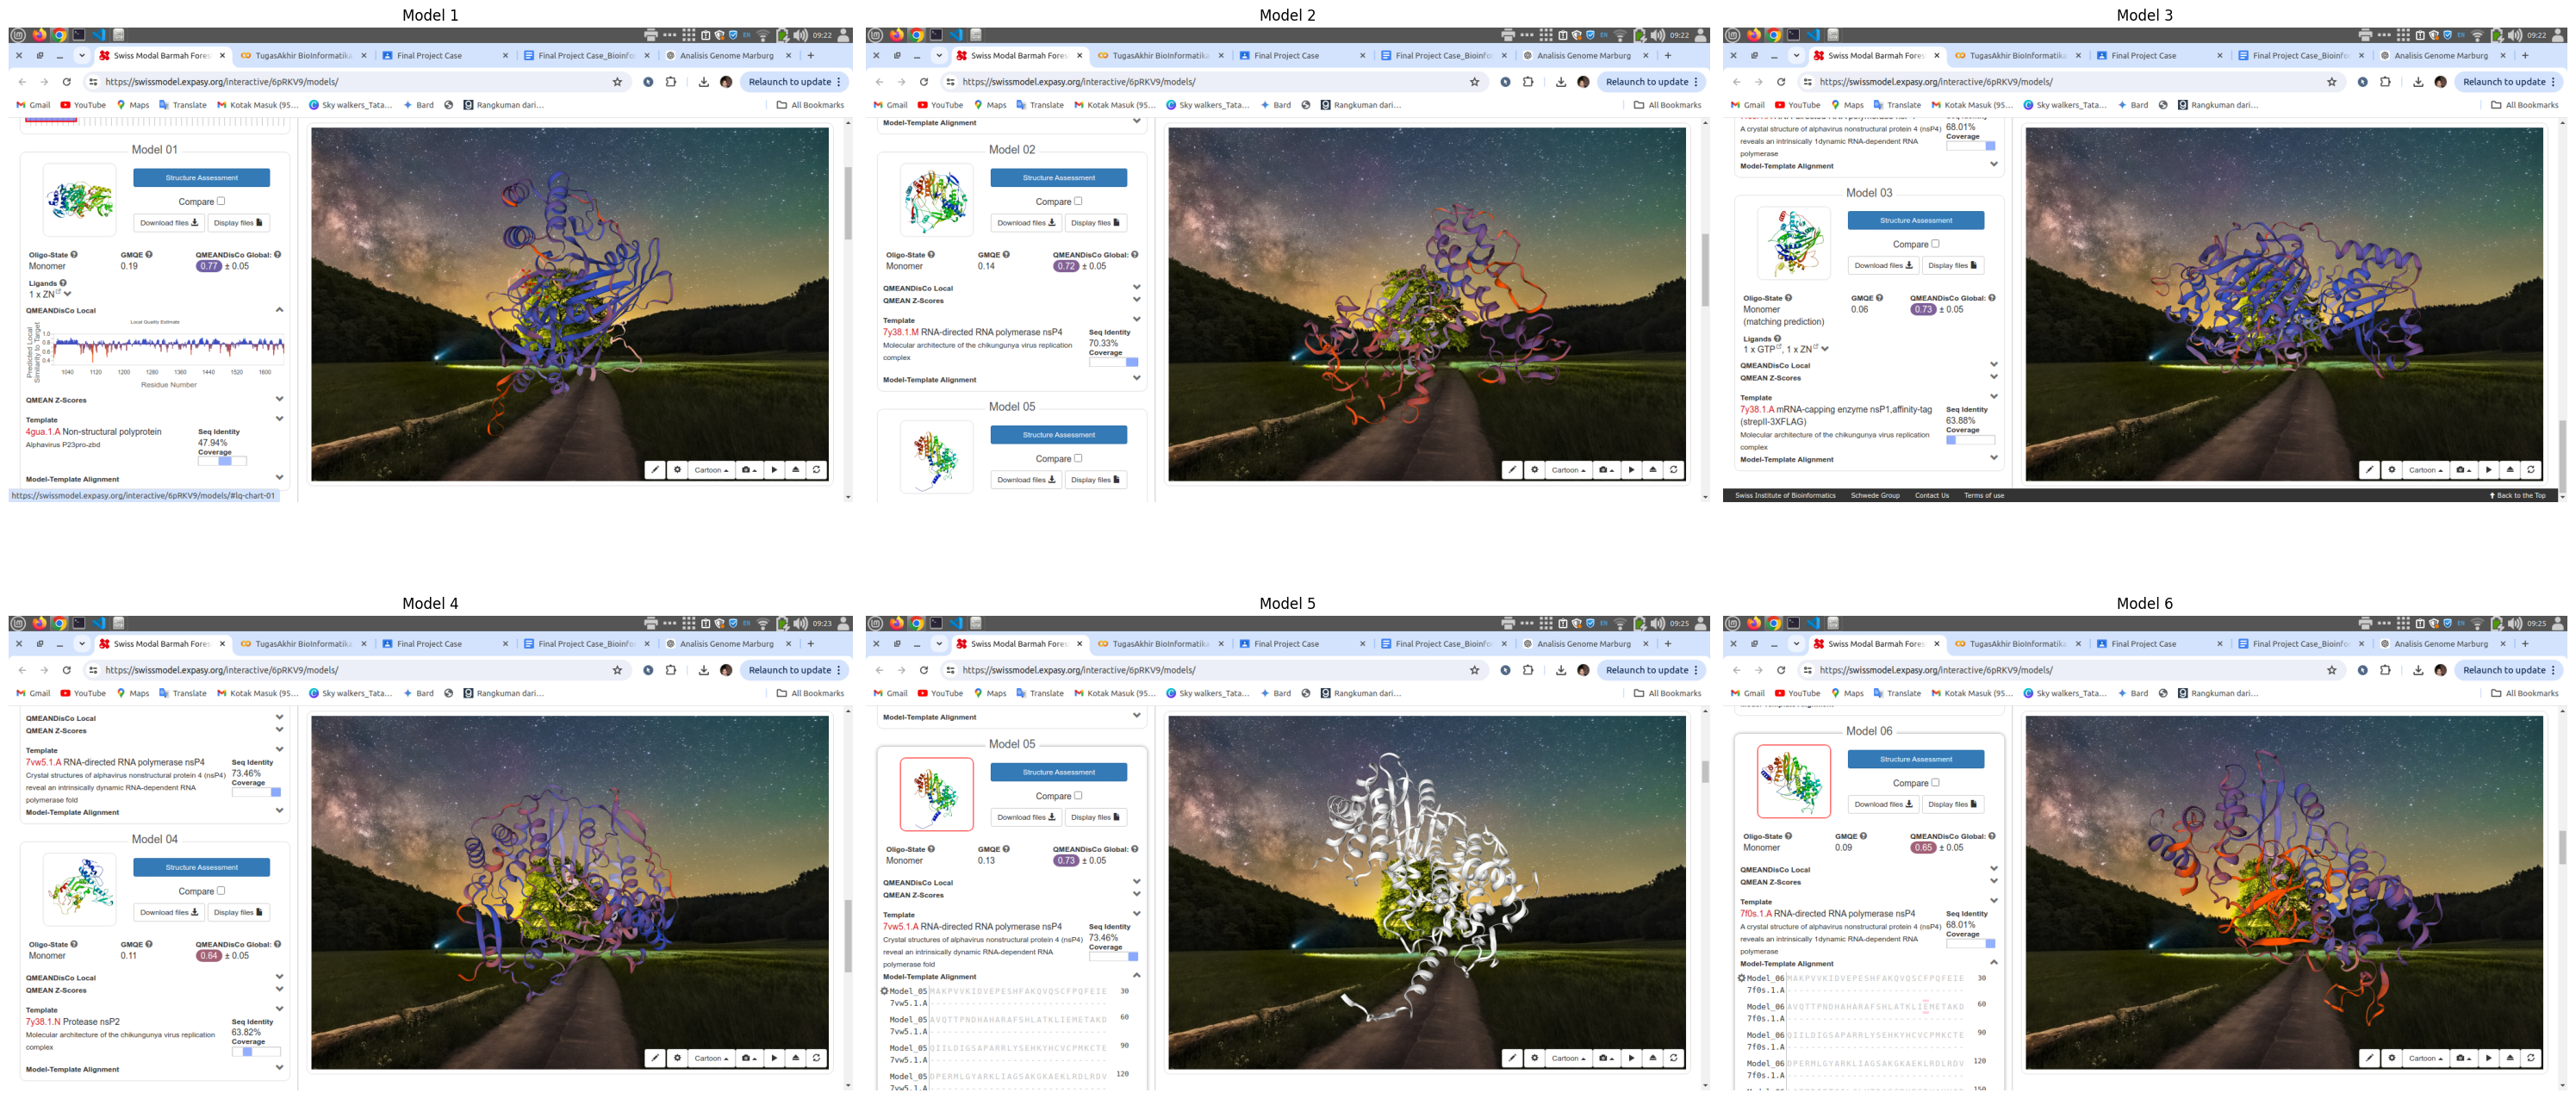

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Daftar file gambar
image_files = [f"model_0{i}.png" for i in range(1, 7)]

# Setup untuk menampilkan gambar
fig, axes = plt.subplots(2, 3, figsize=(30, 15))  # 2 baris, 3 kolom

# Loop untuk menampilkan gambar dengan subjudul
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(image_files[i])  # Membaca gambar
    ax.imshow(img)  # Menampilkan gambar
    ax.axis('off')  # Menghilangkan axis
    ax.set_title(f"Model {i+1}")  # Menambahkan subjudul

plt.tight_layout()  # Menata layout agar rapat
plt.show()
